# Quick Analysis Traces for GPU-Disaggregated Deep Learning Recommendation Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## 1. BASIC DATASET INFORMATION

In [2]:
# Load the dataset
df = pd.read_csv('disaggregated_DLRM_trace.csv')

print("=" * 80)
print("GPU-DISAGGREGATED DLRM TRACE DATASET ANALYSIS")
print("=" * 80)

# 1. BASIC DATASET INFORMATION
print("\n1. DATASET OVERVIEW")
print("-" * 40)
print(f"Total instances: {len(df):,}")
print(f"Number of columns: {df.shape[1]}")
print(f"Dataset shape: {df.shape}")
print(f"\nColumn data types:")
print(df.dtypes)


GPU-DISAGGREGATED DLRM TRACE DATASET ANALYSIS

1. DATASET OVERVIEW
----------------------------------------
Total instances: 23,871
Number of columns: 17
Dataset shape: (23871, 17)

Column data types:
instance_sn               object
role                      object
app_name                  object
cpu_request                int64
cpu_limit                  int64
gpu_request                int64
gpu_limit                  int64
rdma_request               int64
rdma_limit                 int64
memory_request           float64
memory_limit             float64
disk_request             float64
disk_limit               float64
max_instance_per_node      int64
creation_time            float64
scheduled_time           float64
deletion_time            float64
dtype: object


## 2. INSTANCE ROLE DISTRIBUTION

In [3]:
# 2. INSTANCE ROLE DISTRIBUTION
print("\n2. INSTANCE ROLE DISTRIBUTION")
print("-" * 40)
role_dist = df['role'].value_counts()
print(f"CN (CPU Node) instances: {role_dist.get('CN', 0):,} ({role_dist.get('CN', 0)/len(df)*100:.1f}%)")
print(f"HN (Heterogeneous GPU Node) instances: {role_dist.get('HN', 0):,} ({role_dist.get('HN', 0)/len(df)*100:.1f}%)")


2. INSTANCE ROLE DISTRIBUTION
----------------------------------------
CN (CPU Node) instances: 16,485 (69.1%)
HN (Heterogeneous GPU Node) instances: 7,386 (30.9%)


## 3. APPLICATION ANALYSIS

In [4]:
# 3. APPLICATION ANALYSIS
print("\n3. APPLICATION ANALYSIS")
print("-" * 40)
n_apps = df['app_name'].nunique()
print(f"Total number of unique applications: {n_apps}")

# Top 10 applications by instance count
top_apps = df['app_name'].value_counts().head(10)
print("\nTop 10 applications by instance count:")
for i, (app, count) in enumerate(top_apps.items(), 1):
    print(f"  {i}. {app}: {count:,} instances ({count/len(df)*100:.1f}%)")

# Application distribution by role
print("\nApplication distribution by role:")
app_role_dist = df.groupby('role')['app_name'].nunique()
print(f"  CN applications: {app_role_dist.get('CN', 0)}")
print(f"  HN applications: {app_role_dist.get('HN', 0)}")


3. APPLICATION ANALYSIS
----------------------------------------
Total number of unique applications: 156

Top 10 applications by instance count:
  1. app_0: 2,551 instances (10.7%)
  2. app_87: 1,817 instances (7.6%)
  3. app_19: 940 instances (3.9%)
  4. app_2: 775 instances (3.2%)
  5. app_20: 691 instances (2.9%)
  6. app_18: 648 instances (2.7%)
  7. app_62: 623 instances (2.6%)
  8. app_14: 612 instances (2.6%)
  9. app_77: 609 instances (2.6%)
  10. app_21: 569 instances (2.4%)

Application distribution by role:
  CN applications: 156
  HN applications: 156


## 4. RESOURCE ALLOCATION ANALYSIS

In [5]:
# 4. RESOURCE ALLOCATION ANALYSIS
print("\n4. RESOURCE ALLOCATION ANALYSIS")
print("-" * 40)

# CPU Resources
print("\n4.1 CPU Resources:")
for role in ['CN', 'HN']:
    role_df = df[df['role'] == role]
    print(f"\n{role} instances:")
    print(f"  CPU cores - Mean: {role_df['cpu_request'].mean():.1f}, "
          f"Median: {role_df['cpu_request'].median():.0f}, "
          f"Min: {role_df['cpu_request'].min()}, "
          f"Max: {role_df['cpu_request'].max()}")

# GPU Resources
print("\n4.2 GPU Resources:")
gpu_instances = df[df['gpu_request'] > 0]
print(f"Instances with GPU: {len(gpu_instances):,} ({len(gpu_instances)/len(df)*100:.1f}%)")
print(f"GPU allocation distribution:")
gpu_dist = df['gpu_request'].value_counts().sort_index()
for gpu_count, instances in gpu_dist.items():
    print(f"  {gpu_count} GPU(s): {instances:,} instances ({instances/len(df)*100:.1f}%)")

# Memory Resources
print("\n4.3 Memory Resources (GiB):")
for role in ['CN', 'HN']:
    role_df = df[df['role'] == role]
    print(f"\n{role} instances:")
    print(f"  Memory - Mean: {role_df['memory_request'].mean():.1f}, "
          f"Median: {role_df['memory_request'].median():.1f}, "
          f"Min: {role_df['memory_request'].min():.1f}, "
          f"Max: {role_df['memory_request'].max():.1f}")

# RDMA Resources
print("\n4.4 RDMA Resources (% of RNIC bandwidth):")
for role in ['CN', 'HN']:
    role_df = df[df['role'] == role]
    print(f"\n{role} instances:")
    print(f"  RDMA - Mean: {role_df['rdma_request'].mean():.1f}%, "
          f"Median: {role_df['rdma_request'].median():.1f}%, "
          f"Min: {role_df['rdma_request'].min()}%, "
          f"Max: {role_df['rdma_request'].max()}%")

# Disk Resources
print("\n4.5 Disk Resources (GiB):")
for role in ['CN', 'HN']:
    role_df = df[df['role'] == role]
    print(f"\n{role} instances:")
    print(f"  Disk - Mean: {role_df['disk_request'].mean():.1f}, "
          f"Median: {role_df['disk_request'].median():.1f}, "
          f"Min: {role_df['disk_request'].min():.1f}, "
          f"Max: {role_df['disk_request'].max():.1f}")


4. RESOURCE ALLOCATION ANALYSIS
----------------------------------------

4.1 CPU Resources:

CN instances:
  CPU cores - Mean: 72.2, Median: 64, Min: 24, Max: 192

HN instances:
  CPU cores - Mean: 8.5, Median: 8, Min: 2, Max: 24

4.2 GPU Resources:
Instances with GPU: 7,386 (30.9%)
GPU allocation distribution:
  0 GPU(s): 16,485 instances (69.1%)
  1 GPU(s): 7,386 instances (30.9%)

4.3 Memory Resources (GiB):

CN instances:
  Memory - Mean: 363.9, Median: 320.0, Min: 120.0, Max: 1000.0

HN instances:
  Memory - Mean: 46.8, Median: 40.0, Min: 16.0, Max: 400.0

4.4 RDMA Resources (% of RNIC bandwidth):

CN instances:
  RDMA - Mean: 17.6%, Median: 1.0%, Min: 1%, Max: 100%

HN instances:
  RDMA - Mean: 27.9%, Median: 25.0%, Min: 1%, Max: 75%

4.5 Disk Resources (GiB):

CN instances:
  Disk - Mean: 366.4, Median: 255.0, Min: 240.0, Max: 996.0

HN instances:
  Disk - Mean: 178.5, Median: 100.0, Min: 80.0, Max: 680.0


## 5. TEMPORAL ANALYSIS

In [6]:
# 5. TEMPORAL ANALYSIS
print("\n5. TEMPORAL ANALYSIS")
print("-" * 40)

# Handle NaN values in temporal columns
temporal_cols = ['creation_time', 'scheduled_time', 'deletion_time']
for col in temporal_cols:
    non_nan = df[col].notna().sum()
    print(f"{col}: {non_nan:,} valid entries ({non_nan/len(df)*100:.1f}%)")

# Trace duration
valid_times = df[temporal_cols].values.flatten()
valid_times = valid_times[~np.isnan(valid_times)]
if len(valid_times) > 0:
    trace_duration = np.max(valid_times) - np.min(valid_times[valid_times > 0])
    print(f"\nTrace duration: {trace_duration/86400:.1f} days ({trace_duration/3600:.1f} hours)")

# Instance lifetime analysis
df['lifetime'] = df['deletion_time'] - df['creation_time']
valid_lifetimes = df[df['lifetime'] > 0]['lifetime']
if len(valid_lifetimes) > 0:
    print(f"\nInstance lifetime statistics (for instances with valid creation and deletion times):")
    print(f"  Mean: {valid_lifetimes.mean()/3600:.1f} hours")
    print(f"  Median: {valid_lifetimes.median()/3600:.1f} hours")
    print(f"  Min: {valid_lifetimes.min()/60:.1f} minutes")
    print(f"  Max: {valid_lifetimes.max()/86400:.1f} days")

# Scheduling delay analysis
df['scheduling_delay'] = df['scheduled_time'] - df['creation_time']
valid_delays = df[df['scheduling_delay'] >= 0]['scheduling_delay']
if len(valid_delays) > 0:
    print(f"\nScheduling delay statistics:")
    print(f"  Mean: {valid_delays.mean():.1f} seconds")
    print(f"  Median: {valid_delays.median():.1f} seconds")
    print(f"  Max: {valid_delays.max():.1f} seconds")
    print(f"  Instances scheduled immediately: {(valid_delays == 0).sum():,} ({(valid_delays == 0).sum()/len(valid_delays)*100:.1f}%)")


5. TEMPORAL ANALYSIS
----------------------------------------
creation_time: 16,591 valid entries (69.5%)
scheduled_time: 16,591 valid entries (69.5%)
deletion_time: 14,993 valid entries (62.8%)

Trace duration: 31.0 days (743.7 hours)

Instance lifetime statistics (for instances with valid creation and deletion times):
  Mean: 28.5 hours
  Median: 2.3 hours
  Min: 0.0 minutes
  Max: 28.5 days

Scheduling delay statistics:
  Mean: 187.9 seconds
  Median: 0.0 seconds
  Max: 238116.0 seconds
  Instances scheduled immediately: 10,875 (65.5%)


## 6. DEPLOYMENT DENSITY CONSTRAINTS

In [7]:
# 6. DEPLOYMENT DENSITY CONSTRAINTS
print("\n6. DEPLOYMENT DENSITY CONSTRAINTS")
print("-" * 40)
density_dist = df['max_instance_per_node'].value_counts().sort_index()
print("Max instances per node distribution:")
for max_inst, count in density_dist.items():
    if max_inst == -1:
        print(f"  No limit: {count:,} instances ({count/len(df)*100:.1f}%)")
    else:
        print(f"  Max {max_inst}: {count:,} instances ({count/len(df)*100:.1f}%)")


6. DEPLOYMENT DENSITY CONSTRAINTS
----------------------------------------
Max instances per node distribution:
  No limit: 12,248 instances (51.3%)
  Max 2: 6,778 instances (28.4%)
  Max 4: 3,588 instances (15.0%)
  Max 8: 724 instances (3.0%)
  Max 10: 469 instances (2.0%)
  Max 16: 64 instances (0.3%)


## 7. CORRELATION ANALYSIS

In [8]:
# 7. CORRELATION ANALYSIS
print("\n7. RESOURCE CORRELATION ANALYSIS")
print("-" * 40)
resource_cols = ['cpu_request', 'gpu_request', 'memory_request', 'disk_request', 'rdma_request']
corr_matrix = df[resource_cols].corr()
print("Resource allocation correlation matrix:")
print(corr_matrix.round(3))




7. RESOURCE CORRELATION ANALYSIS
----------------------------------------
Resource allocation correlation matrix:
                cpu_request  gpu_request  memory_request  disk_request  \
cpu_request           1.000       -0.787           0.987         0.266   
gpu_request          -0.787        1.000          -0.772        -0.469   
memory_request        0.987       -0.772           1.000         0.271   
disk_request          0.266       -0.469           0.271         1.000   
rdma_request         -0.093        0.173          -0.101        -0.123   

                rdma_request  
cpu_request           -0.093  
gpu_request            0.173  
memory_request        -0.101  
disk_request          -0.123  
rdma_request           1.000  


## 8. RESOURCE PROFILES

In [9]:
# 8. RESOURCE PROFILES
print("\n8. COMMON RESOURCE PROFILES")
print("-" * 40)

# Identify common resource configurations
profile_cols = ['cpu_request', 'gpu_request', 'memory_request', 'rdma_request']
profiles = df.groupby(profile_cols + ['role']).size().reset_index(name='count')
profiles = profiles.sort_values('count', ascending=False).head(10)

print("Top 10 most common resource configurations:")
for idx, row in profiles.iterrows():
    print(f"\nProfile {idx + 1}: {row['count']} instances")
    print(f"  Role: {row['role']}")
    print(f"  CPU: {row['cpu_request']} cores, GPU: {row['gpu_request']}, "
          f"Memory: {row['memory_request']:.0f} GiB, RDMA: {row['rdma_request']}%")


8. COMMON RESOURCE PROFILES
----------------------------------------
Top 10 most common resource configurations:

Profile 7: 4880 instances
  Role: HN
  CPU: 8 cores, GPU: 1, Memory: 40 GiB, RDMA: 25%

Profile 27: 4877 instances
  Role: CN
  CPU: 64 cores, GPU: 0, Memory: 320 GiB, RDMA: 1%

Profile 39: 3798 instances
  Role: CN
  CPU: 96 cores, GPU: 0, Memory: 480 GiB, RDMA: 1%

Profile 21: 2014 instances
  Role: CN
  CPU: 48 cores, GPU: 0, Memory: 240 GiB, RDMA: 1%

Profile 29: 1758 instances
  Role: CN
  CPU: 64 cores, GPU: 0, Memory: 320 GiB, RDMA: 100%

Profile 20: 1292 instances
  Role: CN
  CPU: 48 cores, GPU: 0, Memory: 200 GiB, RDMA: 25%

Profile 15: 661 instances
  Role: HN
  CPU: 12 cores, GPU: 1, Memory: 120 GiB, RDMA: 25%

Profile 23: 636 instances
  Role: CN
  CPU: 48 cores, GPU: 0, Memory: 240 GiB, RDMA: 25%

Profile 8: 504 instances
  Role: HN
  CPU: 8 cores, GPU: 1, Memory: 40 GiB, RDMA: 50%

Profile 40: 434 instances
  Role: CN
  CPU: 96 cores, GPU: 0, Memory: 480 GiB

## 9. VISUALIZATION SECTION


9. GENERATING VISUALIZATIONS
----------------------------------------


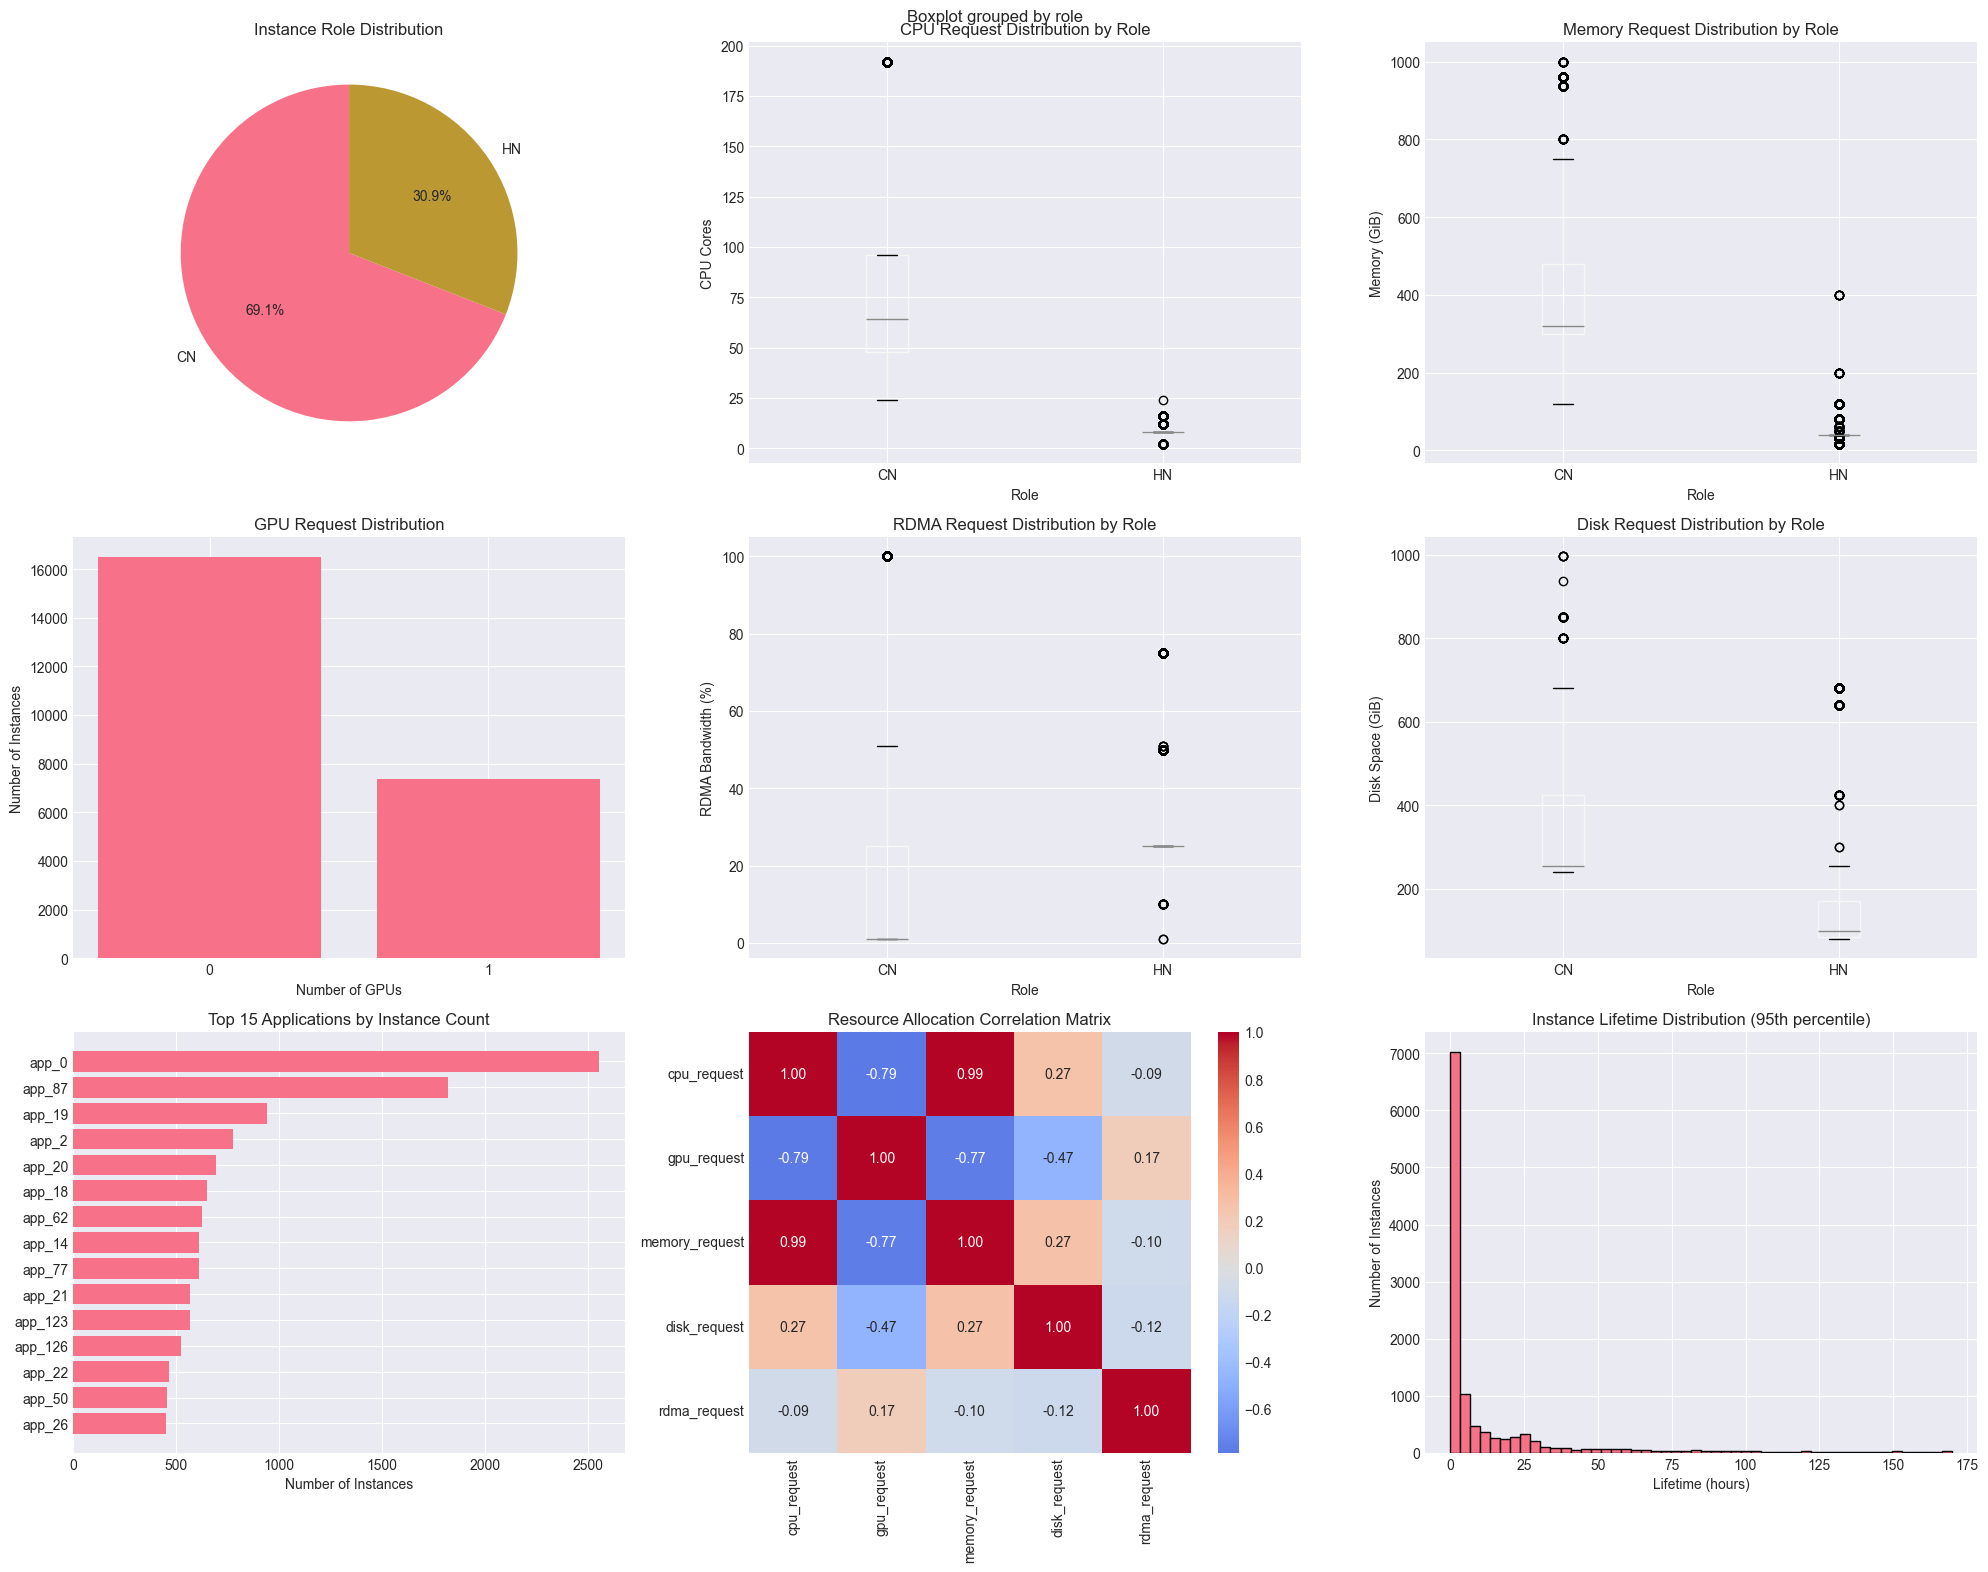

In [10]:
# 9. VISUALIZATION SECTION
print("\n9. GENERATING VISUALIZATIONS")
print("-" * 40)

# Create a figure with subplots
fig = plt.figure(figsize=(20, 16))

# 9.1 Role Distribution Pie Chart
ax1 = plt.subplot(3, 3, 1)
role_dist.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax1)
ax1.set_title('Instance Role Distribution')
ax1.set_ylabel('')

# 9.2 CPU Request Distribution
ax2 = plt.subplot(3, 3, 2)
df.boxplot(column='cpu_request', by='role', ax=ax2)
ax2.set_title('CPU Request Distribution by Role')
ax2.set_xlabel('Role')
ax2.set_ylabel('CPU Cores')
plt.sca(ax2)
plt.xticks(rotation=0)

# 9.3 Memory Request Distribution
ax3 = plt.subplot(3, 3, 3)
df.boxplot(column='memory_request', by='role', ax=ax3)
ax3.set_title('Memory Request Distribution by Role')
ax3.set_xlabel('Role')
ax3.set_ylabel('Memory (GiB)')
plt.sca(ax3)
plt.xticks(rotation=0)

# 9.4 GPU Request Distribution
ax4 = plt.subplot(3, 3, 4)
gpu_dist = df['gpu_request'].value_counts().sort_index()
ax4.bar(gpu_dist.index, gpu_dist.values)
ax4.set_title('GPU Request Distribution')
ax4.set_xlabel('Number of GPUs')
ax4.set_ylabel('Number of Instances')
ax4.set_xticks(gpu_dist.index)

# 9.5 RDMA Request Distribution
ax5 = plt.subplot(3, 3, 5)
df.boxplot(column='rdma_request', by='role', ax=ax5)
ax5.set_title('RDMA Request Distribution by Role')
ax5.set_xlabel('Role')
ax5.set_ylabel('RDMA Bandwidth (%)')
plt.sca(ax5)
plt.xticks(rotation=0)

# 9.6 Disk Request Distribution
ax6 = plt.subplot(3, 3, 6)
df.boxplot(column='disk_request', by='role', ax=ax6)
ax6.set_title('Disk Request Distribution by Role')
ax6.set_xlabel('Role')
ax6.set_ylabel('Disk Space (GiB)')
plt.sca(ax6)
plt.xticks(rotation=0)

# 9.7 Top Applications Bar Chart
ax7 = plt.subplot(3, 3, 7)
top_apps_plot = df['app_name'].value_counts().head(15)
ax7.barh(range(len(top_apps_plot)), top_apps_plot.values)
ax7.set_yticks(range(len(top_apps_plot)))
ax7.set_yticklabels(top_apps_plot.index)
ax7.set_title('Top 15 Applications by Instance Count')
ax7.set_xlabel('Number of Instances')
ax7.invert_yaxis()

# 9.8 Resource Correlation Heatmap
ax8 = plt.subplot(3, 3, 8)
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=ax8)
ax8.set_title('Resource Allocation Correlation Matrix')

# 9.9 Instance Lifetime Distribution (if valid data exists)
ax9 = plt.subplot(3, 3, 9)
if len(valid_lifetimes) > 0:
    valid_lifetimes_hours = valid_lifetimes / 3600
    ax9.hist(valid_lifetimes_hours[valid_lifetimes_hours < np.percentile(valid_lifetimes_hours, 95)], 
             bins=50, edgecolor='black')
    ax9.set_title('Instance Lifetime Distribution (95th percentile)')
    ax9.set_xlabel('Lifetime (hours)')
    ax9.set_ylabel('Number of Instances')
else:
    ax9.text(0.5, 0.5, 'No valid lifetime data', ha='center', va='center')
    ax9.set_title('Instance Lifetime Distribution')

plt.tight_layout()
plt.savefig('dlrm_trace_analysis.png', dpi=300, bbox_inches='tight')
plt.show()



## 10. SUMMARY STATISTICS

In [11]:
# 10. SUMMARY STATISTICS
print("\n10. KEY FINDINGS SUMMARY")
print("-" * 40)
print(f"• Dataset contains {len(df):,} inference instances from {n_apps} unique applications")
print(f"• CN instances dominate ({role_dist.get('CN', 0)/len(df)*100:.1f}%), reflecting CPU-heavy workloads")
print(f"• {len(gpu_instances)/len(df)*100:.1f}% of instances require GPU resources (all HN instances)")
print(f"• Average CPU allocation: CN={df[df['role']=='CN']['cpu_request'].mean():.1f} cores, "
      f"HN={df[df['role']=='HN']['cpu_request'].mean():.1f} cores")
print(f"• Average memory allocation: CN={df[df['role']=='CN']['memory_request'].mean():.1f} GiB, "
      f"HN={df[df['role']=='HN']['memory_request'].mean():.1f} GiB")
print(f"• {(df['max_instance_per_node'] == -1).sum()/len(df)*100:.1f}% of instances have no deployment density constraints")
if len(valid_delays) > 0:
    print(f"• {(valid_delays == 0).sum()/len(valid_delays)*100:.1f}% of instances are scheduled immediately")
print(f"• All instances are categorized as Latency-Sensitive (LS) workloads")

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE")
print("=" * 80)


10. KEY FINDINGS SUMMARY
----------------------------------------
• Dataset contains 23,871 inference instances from 156 unique applications
• CN instances dominate (69.1%), reflecting CPU-heavy workloads
• 30.9% of instances require GPU resources (all HN instances)
• Average CPU allocation: CN=72.2 cores, HN=8.5 cores
• Average memory allocation: CN=363.9 GiB, HN=46.8 GiB
• 51.3% of instances have no deployment density constraints
• 65.5% of instances are scheduled immediately
• All instances are categorized as Latency-Sensitive (LS) workloads

ANALYSIS COMPLETE


# END